In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
X_train = pd.read_csv('dataset_X_train.csv', index_col='index')
y_train = pd.read_csv('dataset_y_train.csv', index_col='index')
X_test = pd.read_csv('dataset_X_test.csv', index_col='index')
y_test = pd.read_csv('dataset_y_test.csv', index_col='index')

In [20]:
X_train.info(), y_train.info(), X_test.info(), y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 16
Data columns (total 29 columns):
cor_0              434 non-null int64
cor_1              434 non-null int64
cor_2              434 non-null int64
cor_3              434 non-null int64
cor_4              434 non-null int64
cor_5              434 non-null int64
cor_6              434 non-null int64
cor_7              434 non-null int64
cor_8              434 non-null int64
cor_9              434 non-null int64
cor_10             434 non-null int64
cor_11             434 non-null int64
cor_12             434 non-null int64
cor_13             434 non-null int64
cor_14             434 non-null int64
cor_15             434 non-null int64
cor_16             434 non-null int64
cor_17             434 non-null int64
cor_18             434 non-null int64
cor_19             434 non-null int64
cor_20             434 non-null int64
cor_21             434 non-null int64
cor_22             434 non-null int64
cor_23             434

(None, None, None, None)

In [21]:
X_train.head()

,cor_0,cor_1,cor_2,cor_3,cor_4,cor_5,cor_6,cor_7,cor_8,cor_9,...,cor_19,cor_20,cor_21,cor_22,cor_23,cor_24,status_hit,status_miss,status_na,status_shipsunk
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,-1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,-1,0,0,0,0,...,0,-1,1,0,0,0,0,1,0,0


<BarContainer object of 5 artists>

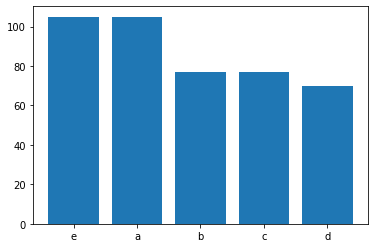

In [22]:
plt.bar(y_train.attack_col.unique(),y_train['attack_col'].value_counts())

<BarContainer object of 5 artists>

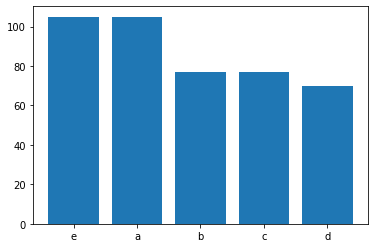

In [23]:
data = pd.concat([X_train, y_train], axis=1)
plt.bar(data['attack_col'].unique(), data['attack_col'].value_counts())

In [24]:
print(data.shape)
max_num = max(data['attack_col'].value_counts())
for label in data['attack_col'].unique():
    label_data = data[data.attack_col == label]
    data = pd.concat([data, label_data.sample(max_num - len(label_data))])
print(data.shape)

(434, 30)
(525, 30)


<BarContainer object of 5 artists>

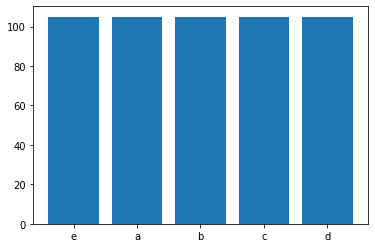

In [25]:
plt.bar(data['attack_col'].unique(), data['attack_col'].value_counts())

In [26]:
# already split from the files so, we dont need to do it here.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((434, 29), (99, 29), (434, 1), (99, 1))

In [36]:
param_dist = {'objective':'multi:softmax', 'num_class':5, 'n_estimators':100, 'max_depth':20}
clf_col = xgb.XGBClassifier(**param_dist)
clf_col.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='merror',  eval_set=[(X_test, y_test)])

[0]	validation_0-merror:0.414141
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.343434
[2]	validation_0-merror:0.343434
[3]	validation_0-merror:0.353535
[4]	validation_0-merror:0.333333
[5]	validation_0-merror:0.313131
[6]	validation_0-merror:0.30303
[7]	validation_0-merror:0.292929
[8]	validation_0-merror:0.292929
[9]	validation_0-merror:0.30303
[10]	validation_0-merror:0.292929
[11]	validation_0-merror:0.30303
[12]	validation_0-merror:0.292929
[13]	validation_0-merror:0.272727
[14]	validation_0-merror:0.252525
[15]	validation_0-merror:0.212121
[16]	validation_0-merror:0.20202
[17]	validation_0-merror:0.20202
[18]	validation_0-merror:0.191919
[19]	validation_0-merror:0.191919
[20]	validation_0-merror:0.191919
[21]	validation_0-merror:0.181818
[22]	validation_0-merror:0.181818
[23]	validation_0-merror:0.181818
[24]	validation_0-merror:0.181818
[25]	validation_0-merror:0.181818
[26]	validation_0-merror:0.181818
[27]	validation_0-merror:0.181

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [37]:
clf_col.score(X_test, y_test)

0.8484848484848485

In [38]:
clf_col.score(X_train, y_train)

0.9216589861751152

In [39]:
y_pred = clf_col.predict(X_test)
y_pred

array(['a', 'b', 'c', 'a', 'b', 'c', 'd', 'e', 'e', 'd', 'e', 'e', 'a',
       'e', 'c', 'c', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'd', 'e', 'd',
       'e', 'c', 'b', 'a', 'c', 'e', 'd', 'e', 'a', 'c', 'e', 'c', 'c',
       'd', 'b', 'b', 'a', 'e', 'e', 'e', 'e', 'd', 'c', 'b', 'a', 'c',
       'c', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'e', 'd', 'd', 'b', 'a',
       'a', 'c', 'a', 'a', 'a', 'a', 'e', 'd', 'c', 'b', 'a', 'c', 'c',
       'd', 'e', 'a', 'd', 'e', 'd', 'a', 'e', 'e', 'a', 'a', 'b', 'b',
       'b', 'd', 'b', 'c', 'c', 'c', 'c', 'e'], dtype=object)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           a       0.79      1.00      0.88        22
           b       0.81      0.87      0.84        15
           c       0.80      0.94      0.86        17
           d       0.86      0.63      0.73        19
           e       1.00      0.81      0.89        26

    accuracy                           0.85        99
   macro avg       0.85      0.85      0.84        99
weighted avg       0.86      0.85      0.85        99



In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[22,  0,  0,  0,  0],
       [ 0, 13,  2,  0,  0],
       [ 1,  0, 16,  0,  0],
       [ 3,  2,  2, 12,  0],
       [ 2,  1,  0,  2, 21]])

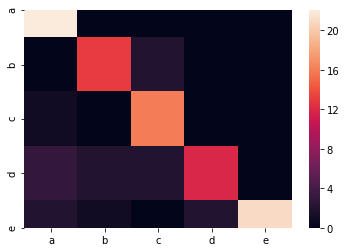

In [42]:
sns.heatmap(cm, xticklabels=clf_col.classes_, yticklabels=clf_col.classes_)

In [43]:
# Save the model
from joblib import dump, load
from datetime import datetime
dump(clf_col, f'clf-col-xgboost-{datetime.now().ctime()}.joblib')


['clf-col-xgboost-Sun Oct 20 19:10:13 2019.joblib']

In [44]:
from sklearn.model_selection import learning_curve
train_size, train_scores, cv_scores = learning_curve(clf_col, X_train, y_train)
train_size.shape, train_scores.shape, cv_scores.shape

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((5,), (5, 3), (5, 3))

In [45]:
train_scores_mean = np.mean(train_scores, axis=1)
cv_scores_mean = np.mean(cv_scores, axis=1)

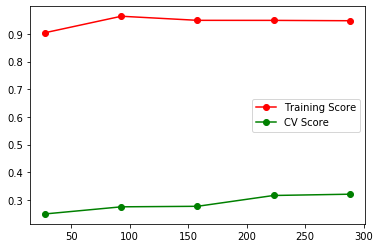

In [46]:
plt.plot(train_size, train_scores_mean, 'o-', color='red', label='Training Score')
plt.plot(train_size, cv_scores_mean, 'o-', color='green', label='CV Score')
plt.legend()
plt.show()